In [ ]:
# as you can see current ram is 12GB only, to increase it run below code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras

import numpy as np 
import pandas as pd
import glob
import cv2
import os
from pathlib import Path
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

import os
import tensorflow as tf
from keras import layers
from keras import Model
from os import getcwd
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, Dropout,Flatten
from keras import backend as K
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.xception import preprocess_input


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data_dir = Path('/content/COVID Splitaug2') # Your Dataset Location Path
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
#test_dir2 = os.path.join(data_dir, 'Test2')
val_dir = os.path.join(data_dir, 'Val')
train_malaria_dir = os.path.join(train_dir, 'COVID') #Replace the folder names
train_uninfected_dir = os.path.join(train_dir, 'NON-COVID')
validation_malaria_dir = os.path.join(val_dir, 'COVID')
validation_uninfected_dir = os.path.join(val_dir, 'NON-COVID')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
#test_malaria_dir2 = os.path.join(test_dir2, 'COVID') #Replace the folder names
#test_uninfected_dir2 = os.path.join(test_dir2, 'NON-COVID')

train_malaria_fnames = os.listdir(train_malaria_dir)
train_uninfected_fnames = os.listdir(train_uninfected_dir)
validation_malaria_fnames = os.listdir(validation_malaria_dir)
validation_uninfected_fnames = os.listdir(validation_uninfected_dir)
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
##test_malaria_fnames2 = os.listdir(test_malaria_dir2)
#test_uninfected_fnames2 = os.listdir(test_uninfected_dir2)


print(len(train_malaria_fnames))
print(len(validation_malaria_fnames))
print(len(train_uninfected_fnames))
print(len(validation_uninfected_fnames))
print("Test Covid", len(test_malaria_fnames))
print("Test Noncovid", len(test_uninfected_fnames))



955
60
1170
58
Test Covid 98
Test Noncovid 105


In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(224, 224)
                                                    )
validation_datagen = ImageDataGenerator(rescale=1./255
                                        #preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                                        )
 

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=8,
                                                              class_mode='categorical',
                                                              target_size=(224, 224))

Found 2125 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [51]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer= keras.optimizers.Adam(lr =0.00001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization_28 (Batc (None, 222, 222, 16)      64        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 111, 111, 16)      64        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_30 (Batc (None, 109, 109, 32)      128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 32)       

In [52]:
early = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=1
)
#history = model.fit(
            #x=X_train, y=y_train, 
             #       batch_size=16,
              #      epochs=50, 
               #     validation_data=(X_val , y_val),callbacks = [early],
            #
            #verbose=1
        #)
history = model.fit_generator(train_generator,
            validation_data = validation_generator,
            epochs = 30, 
            callbacks = [early]
            )

Epoch 1/30
133/133 [==============================] - 28s 213ms/step - loss: 0.6166 - accuracy: 0.7012 - val_loss: 0.9783 - val_accuracy: 0.4915
Epoch 2/30
133/133 [==============================] - 28s 211ms/step - loss: 0.2679 - accuracy: 0.8922 - val_loss: 1.0489 - val_accuracy: 0.5169
Epoch 3/30
133/133 [==============================] - 28s 209ms/step - loss: 0.1801 - accuracy: 0.9416 - val_loss: 0.7337 - val_accuracy: 0.6017
Epoch 4/30
133/133 [==============================] - 28s 210ms/step - loss: 0.1215 - accuracy: 0.9718 - val_loss: 0.2953 - val_accuracy: 0.8983
Epoch 5/30
133/133 [==============================] - 28s 213ms/step - loss: 0.0987 - accuracy: 0.9760 - val_loss: 0.2027 - val_accuracy: 0.9068
Epoch 6/30
133/133 [==============================] - 28s 210ms/step - loss: 0.0752 - accuracy: 0.9896 - val_loss: 0.1906 - val_accuracy: 0.9153
Epoch 7/30
133/133 [==============================] - 28s 211ms/step - loss: 0.0654 - accuracy: 0.9896 - val_loss: 0.1872 - val_ac

In [53]:
data_dir = Path('/content/COVID Splitaug2')
test_dir = os.path.join(data_dir, 'Test')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
print(len(test_malaria_fnames))
print(len(test_uninfected_fnames))

98
105


In [54]:
testGenerator = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_dir, 
                                                      batch_size=16,
                                                    class_mode='categorical',shuffle=False,target_size=(224,224)
                                                      )

Found 203 images belonging to 2 classes.


In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
batch_size = 16
num_of_test_samples = 203
predictions = model.predict_generator(testGenerator)

y_pred = np.argmax(predictions, axis=1)

true_classes = testGenerator.classes

class_labels = list(testGenerator.class_indices.keys())   

print(class_labels)

print(confusion_matrix(testGenerator.classes, y_pred))

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

['COVID', 'NON-COVID']
[[85 13]
 [ 9 96]]
              precision    recall  f1-score   support

       COVID       0.90      0.87      0.89        98
   NON-COVID       0.88      0.91      0.90       105

    accuracy                           0.89       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.89      0.89      0.89       203



In [56]:
accuracy_score(testGenerator.classes, y_pred)


0.8916256157635468

In [57]:
from sklearn.metrics import  f1_score,roc_auc_score,  accuracy_score
f1_score(testGenerator.classes, y_pred)


0.8971962616822431

In [58]:
roc_auc_score(testGenerator.classes, y_pred)

0.8908163265306122

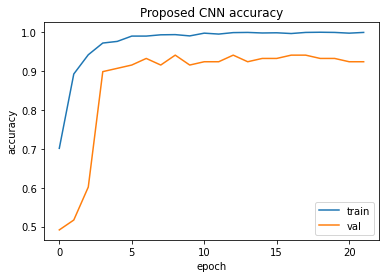

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Proposed CNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

#plt.savefig('cnnaccpneu1.png')
plt.show()

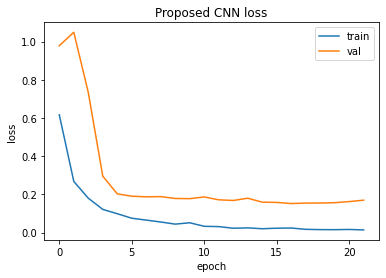

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Proposed CNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

#plt.savefig('cnnaccpneu1.png')
plt.show()

Confusion Matrix


Text(0.5, 1.0, 'Confusion matrix ')

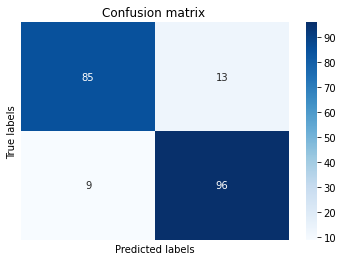

In [61]:
print('Confusion Matrix')
cm = confusion_matrix(testGenerator.classes, y_pred)
sns.heatmap(cm,annot = True, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
#plt.savefig('cnncmpneu.png')